In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("churn_modelling.csv")

In [26]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1, inplace = True)

In [28]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
states = pd.get_dummies(df["Geography"])
states

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [30]:
gender = pd.get_dummies(df["Gender"])
gender

,Female,Male
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
9995,False,True
9996,False,True
9997,True,False
9998,False,True


In [31]:
df = pd.concat([df, states, gender], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [32]:
df.drop(["Geography", "Gender"], axis = 1, inplace = True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [33]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'France', 'Germany',
       'Spain', 'Female', 'Male'],
      dtype='object')

In [34]:
X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'France', 'Germany',
       'Spain', 'Female', 'Male']]
Y = df['Exited']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [36]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(units = 64, activation = "relu", input_dim = x_train.shape[1]))
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_split = 0.1)

Epoch 1/50
225/225 [==============================] - 3s 6ms/step - loss: 0.4882 - accuracy: 0.7926 - val_loss: 0.4526 - val_accuracy: 0.7975
Epoch 2/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4510 - accuracy: 0.8074 - val_loss: 0.4268 - val_accuracy: 0.8138
Epoch 3/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4291 - accuracy: 0.8142 - val_loss: 0.4100 - val_accuracy: 0.8200
Epoch 4/50
225/225 [==============================] - 1s 4ms/step - loss: 0.4124 - accuracy: 0.8222 - val_loss: 0.3958 - val_accuracy: 0.8300
Epoch 5/50
225/225 [==============================] - 1s 4ms/step - loss: 0.3912 - accuracy: 0.8360 - val_loss: 0.3839 - val_accuracy: 0.8375
Epoch 6/50
225/225 [==============================] - 1s 4ms/step - loss: 0.3712 - accuracy: 0.8464 - val_loss: 0.3599 - val_accuracy: 0.8500
Epoch 7/50
225/225 [==============================] - 1s 4ms/step - loss: 0.3603 - accuracy: 0.8543 - val_loss: 0.3539 - val_accuracy: 0.8525
Epoch 

In [44]:
y_pred = model.predict(x_test)
y_pred
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [46]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.862


In [47]:
print("confusion matrix\n", confusion_matrix(y_test, y_pred))

confusion matrix
 [[1539   51]
 [ 225  185]]


<Axes: >

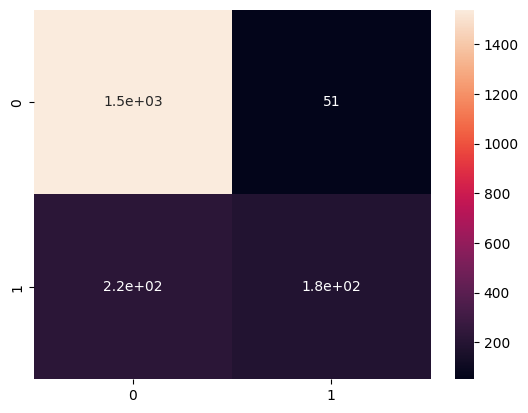

In [48]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1590
           1       0.78      0.45      0.57       410

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
